# Health Insurance Cost Prediction

### 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

### Tabulating the results

from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### 2. Importing the data

In this section, I will fetch the dataset that is available in the Kaggle's project description in the Data section.

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each customer. Your model will be based on “features” like Age, Sex, BMI, Children, etc. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth. It is your job to predict these outcomes. For each customer, our task is to predict the Health Insurance Cost Price for that customer.

In [2]:
### Fetching the dataset

dataset = pd.read_csv('../Datasets/insurance.csv')

In [3]:
### Looking at the sample data in the dataset

dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
### Shape of the dataset

dataset.shape

(1338, 7)

The dataset consists of 7 columns and 1338 rows.

### 3. Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset - Sex, Smoker, Region and the numerical columns of the dataset - Age, BMI, Children, Charges.

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [5]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here, the columns - Sex, Smoker, and Region are categorical. Hence, we modify the datatypes of these column to category.

In [6]:
### Modifying the datatypes of the columns to category

dataset.sex = dataset.sex.astype('category')
dataset.smoker = dataset.smoker.astype('category')
dataset.region = dataset.region.astype('category')

Looking at the modified datatypes of the columns in the dataset.

In [7]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


From the above data, we can see that the datatypes of these columns are modified to category. Now, lets check if the dataset has any missing values or not.

<AxesSubplot:>

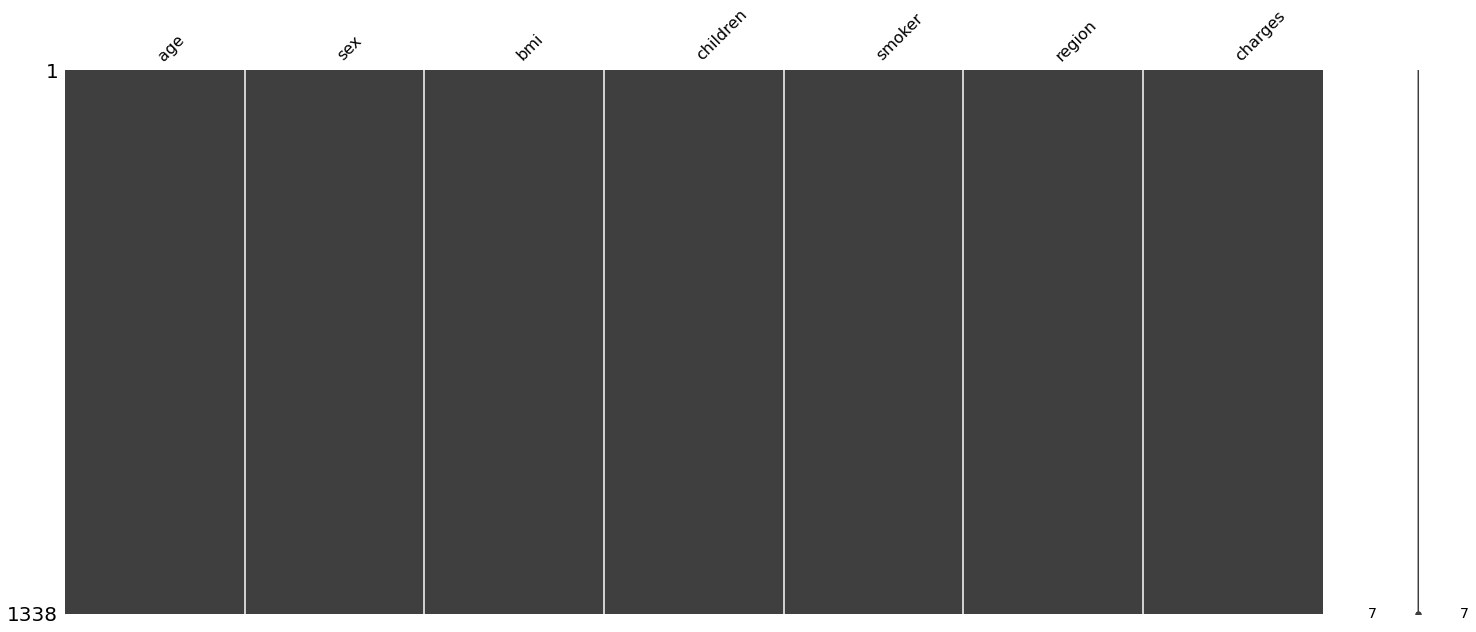

In [8]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

From the above figure, we can see that there are no missing values in the dataset.

In [9]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 3.2 Feature Analysis

##### 3.2.1 Categorical variable - sex

In [10]:
### Value counts of the column - sex

sex_count = dataset['sex'].value_counts(dropna = False)
sex_count

male      676
female    662
Name: sex, dtype: int64

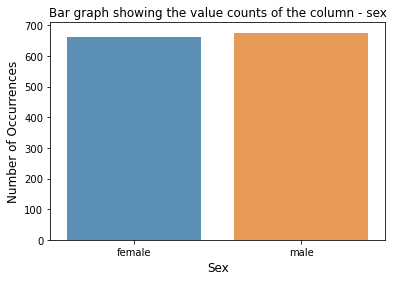

In [11]:
### Bar graph showing the value counts of the column - sex

sns.barplot(sex_count.index, sex_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - sex')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

From the above graph, we can see that there are almost equal records of both men and women.

In [12]:
### Mean price for each sex 

mean_price_sex = dataset[['sex', 'charges']].groupby('sex', as_index = False).mean()
mean_price_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


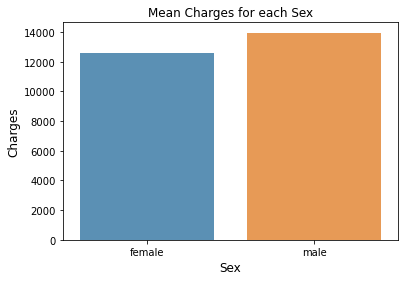

In [13]:
### Mean charges for each sex

sns.barplot(mean_price_sex['sex'], mean_price_sex['charges'], alpha = 0.8)
plt.title('Mean Charges for each Sex')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

On observing the above graph, we can see that the mean charges is higher in males than compared to females.

##### 3.2.2 Categorical variable - smoker

In [14]:
### Value counts of the column - smoker

smoker_count = dataset['smoker'].value_counts(dropna = False)
smoker_count

no     1064
yes     274
Name: smoker, dtype: int64

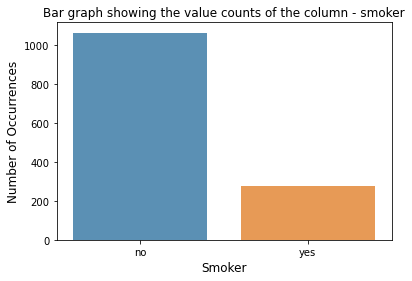

In [15]:
### Bar graph showing the value counts of the column - smoker

sns.barplot(smoker_count.index, smoker_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - smoker')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Smoker', fontsize = 12)
plt.show()

From the above graph, we can see that most of the records in the dataset belong to non-smokers.

In [16]:
### Mean price for smoker 

mean_price_smoker = dataset[['smoker', 'charges']].groupby('smoker', as_index = False).mean()
mean_price_smoker

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


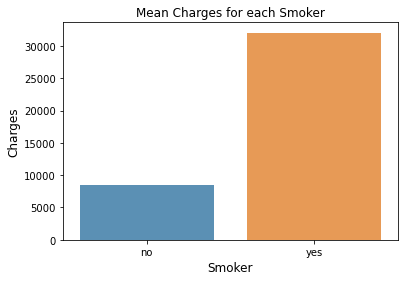

In [17]:
### Mean charges for each sex

sns.barplot(mean_price_smoker['smoker'], mean_price_smoker['charges'], alpha = 0.8)
plt.title('Mean Charges for each Smoker')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Smoker', fontsize = 12)
plt.show()

From the above graph, we can see that the mean charges are higher for an individual who smokes than their non-smoking counterparts.

This could also be the reason why men pay higher charges than female. This statement can only become true if most of the smokers are male.

Text(0.5, 1.0, 'Mean Charges by Sex and Smoker')

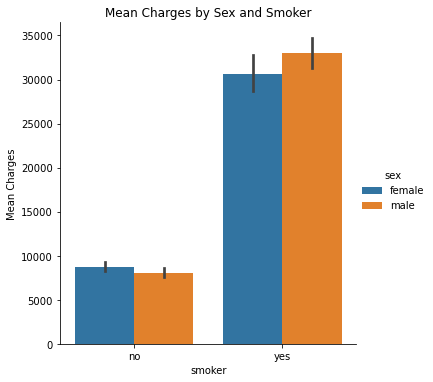

In [18]:
### Mean Charges by Sex and Smoker

sns.factorplot(x = 'smoker', y = 'charges', hue = 'sex', data = dataset, kind = 'bar')
plt.ylabel('Mean Charges')
plt.title('Mean Charges by Sex and Smoker')

From the above graph, we can see that most of the people who smoke are male, hence they have high charges. Therefore, our statement is true.

##### 3.2.3 Categorical variable - region

In [19]:
### Value counts of the column - region

region_count = dataset['region'].value_counts(dropna = False)
region_count

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

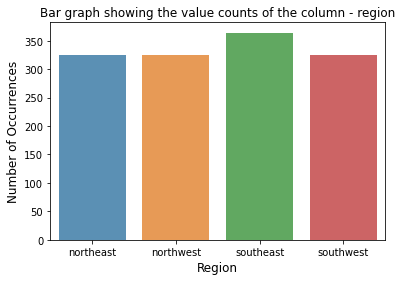

In [20]:
### Bar graph showing the value counts of the column - region

sns.barplot(region_count.index, region_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - region')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

From the above graph, we can see that most of the records in the dataset belong to the South East region.

In [21]:
### Mean price for region 

mean_price_region = dataset[['region', 'charges']].groupby('region', as_index = False).mean()
mean_price_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


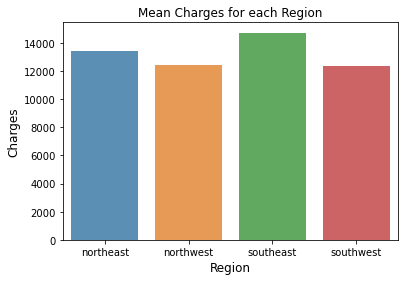

In [22]:
### Mean charges for each region

sns.barplot(mean_price_region['region'], mean_price_region['charges'], alpha = 0.8)
plt.title('Mean Charges for each Region')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

Now, let's look at the distribution of sex for each region and the mean charges for each region.

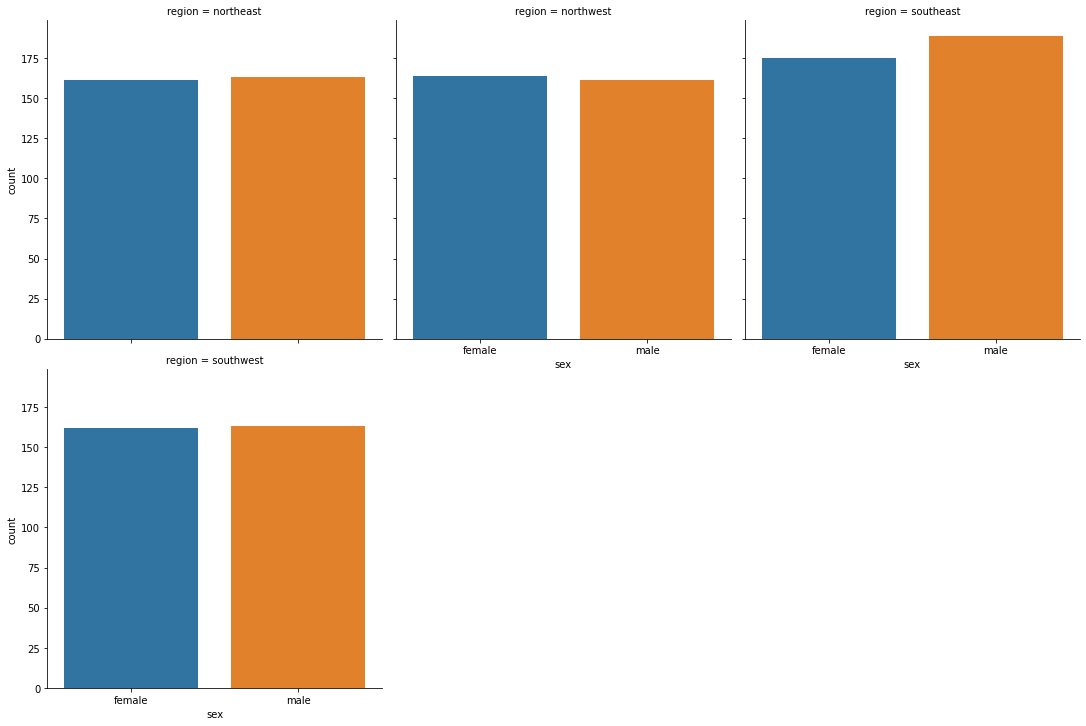

In [23]:
### Distribution of sex for each region

sns.factorplot('sex', col = 'region', data = dataset, kind = 'count', col_wrap = 3)

From the above graph, we can see that for every region the ratio between male and female is same except for Southeast region. Hence, the mean charge is high in the South east region than compared to other regions. We will also plot the above graph using Smoker instead of Sex.

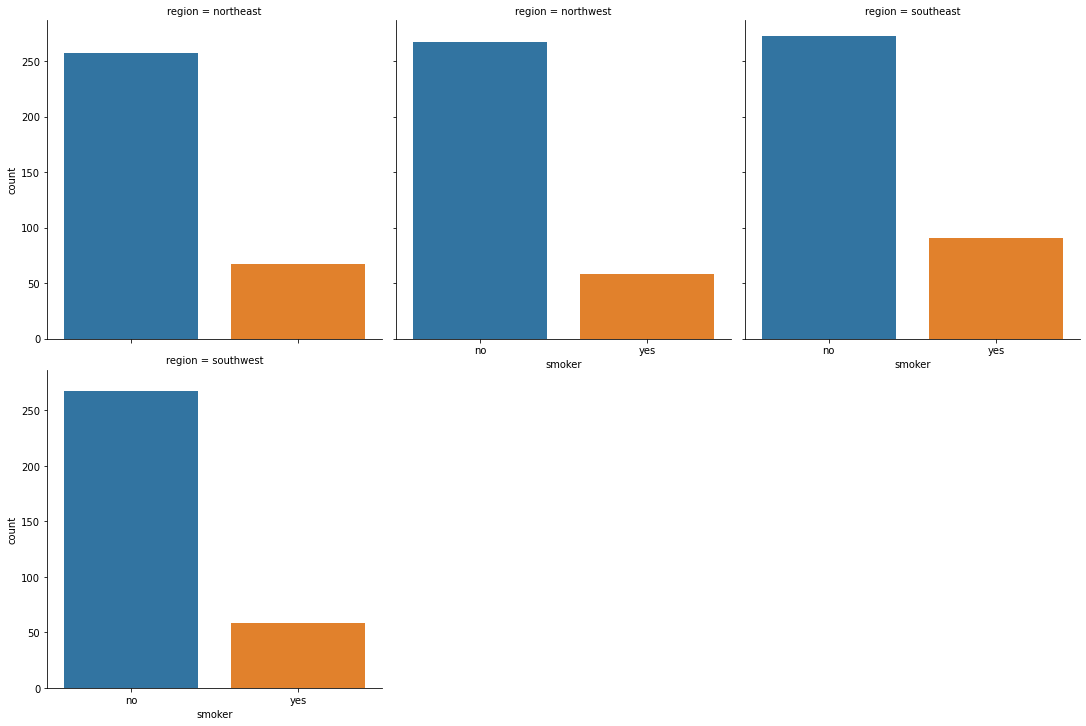

In [24]:
### Distribution of smoker for each region

sns.factorplot('smoker', col = 'region', data = dataset, kind = 'count', col_wrap = 3)

From the above graph, we can see that there are more people who smoke in Southeast region than compared to other regions. Hence, the higher mean charge in the Southeast region.

##### 3.2.4 Numerical variable - age

Text(0.5, 1.0, 'Distribution of the column - age')

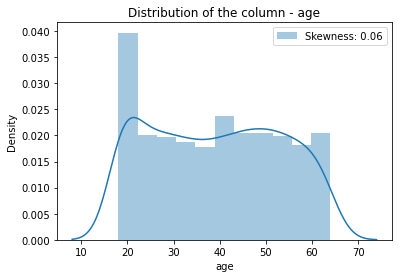

In [25]:
### Understanding the distribution of the column - age

sns.distplot(dataset['age'], label = 'Skewness: %.2f'%(dataset['age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - age')

From the above graph, we can see that the distribution has very less skewness.

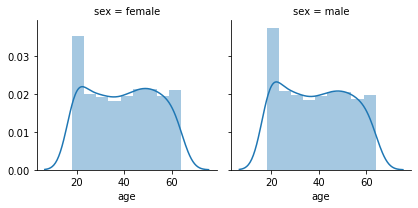

In [26]:
### Age distribution by sex

grid = sns.FacetGrid(dataset, col = 'sex')
grid.map(sns.distplot, 'age')

From the above graphs, we can see that the age distribution is similar in both the sex.

Text(0.5, 1.0, 'Age Distribution by Sex')

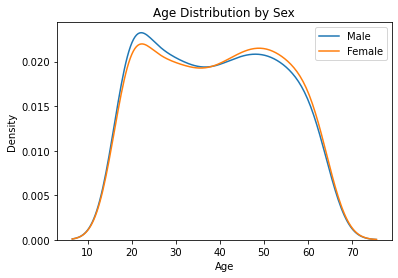

In [27]:
### Merging both the above graphs into one

sns.kdeplot(dataset['age'][dataset['sex'] == 'male'], label = 'Male')
sns.kdeplot(dataset['age'][dataset['sex'] == 'female'], label = 'Female')
plt.xlabel('Age')
plt.legend()
plt.title('Age Distribution by Sex')

From the above graph, we can see that for age close to 20 there are more male records in the dataset, whereas in case of age > 40 there are more female records.

<AxesSubplot:>

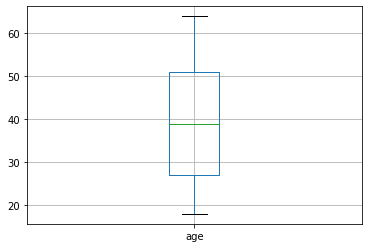

In [28]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['age'])

From the above boxplot, we can see that there are no outliers in the column.

##### 3.2.5 Numerical variable - bmi

Text(0.5, 1.0, 'Distribution of the column - bmi')

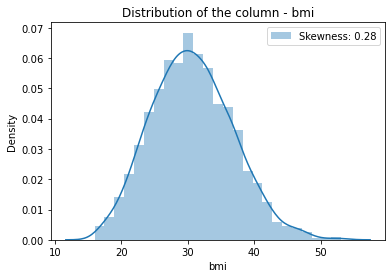

In [29]:
### Understanding the distribution of the column - bmi

sns.distplot(dataset['bmi'], label = 'Skewness: %.2f'%(dataset['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - bmi')

From the above graph, we can see that the bmi column is normally distributed with a slight tail at the right.

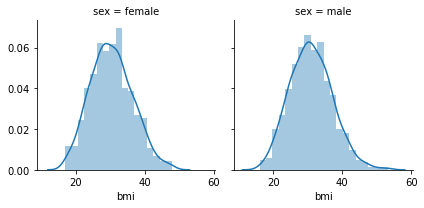

In [30]:
### BMI distribution by sex

grid = sns.FacetGrid(dataset, col = 'sex')
grid.map(sns.distplot, 'bmi')

From the above graph, we can see that both the graphs look similar, except in the case of male where the graph has a slight tail to the right.

Text(0.5, 1.0, 'BMI Distribution by Sex')

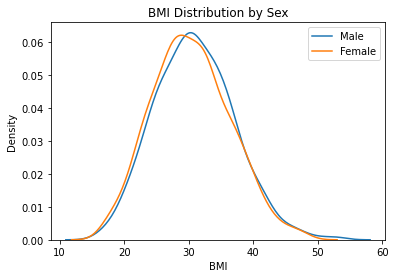

In [31]:
### Merging both the above graphs into one

sns.kdeplot(dataset['bmi'][dataset['sex'] == 'male'], label = 'Male')
sns.kdeplot(dataset['bmi'][dataset['sex'] == 'female'], label = 'Female')
plt.xlabel('BMI')
plt.legend()
plt.title('BMI Distribution by Sex')

<AxesSubplot:>

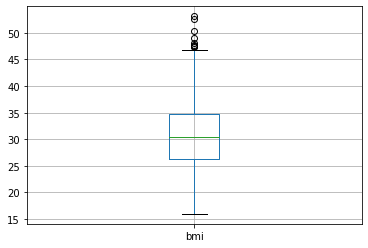

In [32]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['bmi'])

From the above graph, we can see that there are a few outliers in the column - bmi. We will focus on removing these outliers during the Data Preprocessing phase.

##### 3.2.6 Numerical column - children

Text(0.5, 1.0, 'Distribution of the column - children')

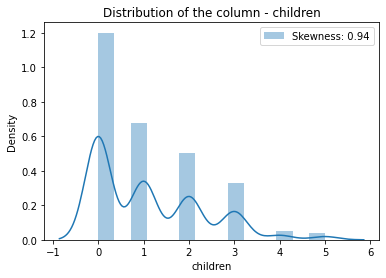

In [33]:
### Understanding the distribution of the column - children

sns.distplot(dataset['children'], label = 'Skewness: %.2f'%(dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

From the above graph, we can see that the graph is slightly skewed. Hence, we will remove this skewness during the Data Preprocessing phase.

<AxesSubplot:>

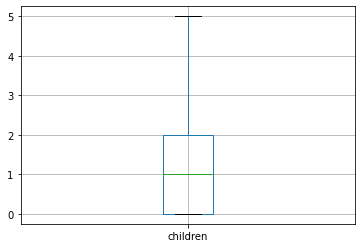

In [34]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['children'])

From the above boxplot, we can see that there are no outliers in the column.

##### 3.2.7 Numerical variable - charges

Text(0.5, 1.0, 'Distribution of the column - charges')

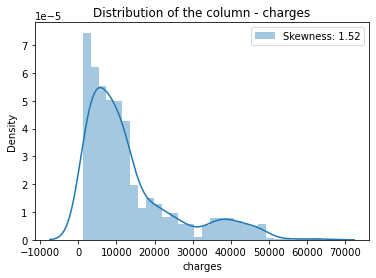

In [35]:
### Understanding the distribution of the column - charges

sns.distplot(dataset['charges'], label = 'Skewness: %.2f'%(dataset['charges'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - charges')

<AxesSubplot:>

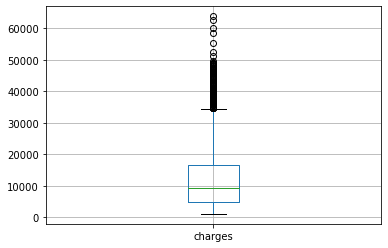

In [36]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['charges'])

From the above graph, we can see that there are a few outliers in the column - charges. We will focus on removing these outliers during the Data Preprocessing phase.

### 4. Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop unnecessary columns
3. Data Trasformation
4. Feature Encoding
5. Feature Selection

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [37]:
### Now we will try to remove the rows based on the outliers in the column - charges

modified_dataset = dataset[(np.abs(stats.zscore(dataset[['charges']])) < 3)]

In [38]:
### Size of the dataset

print('Before: ', len(dataset))
print('After: ', len(modified_dataset))

Before:  1338
After:  1331


#### 4.2 Drop unnecessary columns

From the dataset, we can see that the column region is redundant, as we can see that it is completely dependent on the columns sex and smoker.

In [39]:
### Dropping the column - region

modified_dataset.drop(['region'], axis = 1, inplace = True)

In [40]:
### Looking at the modified dataset

modified_dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


#### 4.3 Data Transformation

Here, we will focus on transforming the column - children using Box Cox transformation. After that we will scale all the columns using Min Max normalization.

##### 4.3.1 Box Cox transforming the column - children

Text(0.5, 1.0, 'Distribution of the column - children')

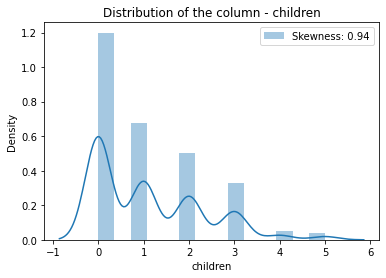

In [41]:
### Understanding the distribution of the column - children

sns.distplot(modified_dataset['children'], label = 'Skewness: %.2f'%(modified_dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

Text(0.5, 1.0, 'Distribution of the column - children')

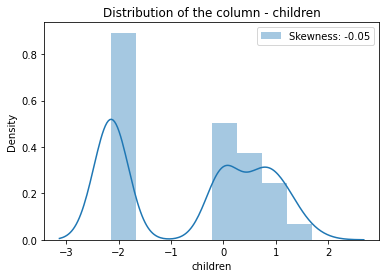

In [42]:
### Understanding the distribution of the data Box_Cox(children)

children_data = [0.1 if value == 0 else value for value in modified_dataset['children']]

modified_children, _ = stats.boxcox(children_data)
modified_dataset['children'] = modified_children

sns.distplot(modified_dataset['children'], label = 'Skewness: %.2f'%(modified_dataset['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

From the above graph, we can see that most of the skewness is removed in the column.

##### 4.3.2 Normalizing the numerical columns

In [43]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['age', 'bmi', 'children']

for each_column in numerical_columns:
    normalize_columns(modified_dataset, each_column)

In [44]:
### Looking at the sample records of the dataset

modified_dataset

,age,sex,bmi,children,smoker,charges
0,0.021739,female,0.321227,0.000000,yes,16884.92400
1,0.000000,male,0.479150,0.558513,no,1725.55230
2,0.217391,male,0.458434,0.854987,no,4449.46200
3,0.326087,male,0.181464,0.000000,no,21984.47061
4,0.304348,male,0.347592,0.000000,no,3866.85520
...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.854987,no,10600.54830
1334,0.000000,female,0.429379,0.000000,no,2205.98080
1335,0.000000,female,0.562012,0.000000,no,1629.83350
1336,0.065217,female,0.264730,0.000000,no,2007.94500


#### 4.4 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

Here, we will use One Hot Encoding for the columns - sex, smoker

In [45]:
### One Hot Encoding the columns - sex, smoker of the dataset

encoded_dataset = pd.get_dummies(data = modified_dataset, columns = ['sex', 'smoker'])
encoded_dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.000000,16884.92400,1,0,0,1
1,0.000000,0.479150,0.558513,1725.55230,0,1,1,0
2,0.217391,0.458434,0.854987,4449.46200,0,1,1,0
3,0.326087,0.181464,0.000000,21984.47061,0,1,1,0
4,0.304348,0.347592,0.000000,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.854987,10600.54830,0,1,1,0
1334,0.000000,0.429379,0.000000,2205.98080,1,0,1,0
1335,0.000000,0.562012,0.000000,1629.83350,1,0,1,0
1336,0.065217,0.264730,0.000000,2007.94500,1,0,1,0


In [46]:
### Create the column - Target using charges

target_data = encoded_dataset['charges']
encoded_dataset['Target'] = target_data

### Dropping the column - charges

encoded_dataset.drop(['charges'], axis = 1, inplace = True)
encoded_dataset

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,Target
0,0.021739,0.321227,0.000000,1,0,0,1,16884.92400
1,0.000000,0.479150,0.558513,0,1,1,0,1725.55230
2,0.217391,0.458434,0.854987,0,1,1,0,4449.46200
3,0.326087,0.181464,0.000000,0,1,1,0,21984.47061
4,0.304348,0.347592,0.000000,0,1,1,0,3866.85520
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.854987,0,1,1,0,10600.54830
1334,0.000000,0.429379,0.000000,1,0,1,0,2205.98080
1335,0.000000,0.562012,0.000000,1,0,1,0,1629.83350
1336,0.065217,0.264730,0.000000,1,0,1,0,2007.94500


##### 4.5 Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

##### 4.5.1 Plotting the correlation matrix for the numerical columns

In [47]:
### Creating a filter_dataset

filter_dataset = encoded_dataset[['age', 'bmi', 'children']]
filter_dataset

,age,bmi,children
0,0.021739,0.321227,0.000000
1,0.000000,0.479150,0.558513
2,0.217391,0.458434,0.854987
3,0.326087,0.181464,0.000000
4,0.304348,0.347592,0.000000
...,...,...,...
1333,0.695652,0.403820,0.854987
1334,0.000000,0.429379,0.000000
1335,0.000000,0.562012,0.000000
1336,0.065217,0.264730,0.000000


Text(0.5, 1.0, 'Correlation Heatmap')

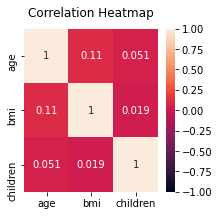

In [48]:
### Plotting the correlation between various columns of the filter_dataset

plt.figure(figsize = (3, 3))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

From the above correlation matrix, we can see that there are a no strong correlations between the data. We will use VIF to check for multi collinearity.

##### 4.5.2 Removing the columns that cause multicollinearity using VIF

In [49]:
### Detecting the columns that cause multicollinearity using VIF

column_names = list(filter_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_dataset.loc[:, filter_dataset.columns == name]
        X = filter_dataset.loc[:, filter_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))
        
        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: age and VIF: 1.01
Column: bmi and VIF: 1.01
Column: children and VIF: 1.0


From the above data, we can see that there are no columns that cause multicollinearity.

### 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Health Insurance Price Prediction is a regression problem, we will need to use regression models, also known as regressors, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following regression models for the job:

1. Multi Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Support Vector Regression
5. Decision Tree regression
6. Random Forest Regression
7. Stacking Regression
8. XGBoost Regression

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their Root Mean Squared Error (RMSE), R-squared at making predictions. Then, we will select the best model based on those values.

#### 5.1 Splitting the dataset into Training and Test sets

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [50]:
### Splitting the dataset to the matrices X and Y

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [51]:
### Looking at the new training data - X

X

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.55851288, ..., 1.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.85498693, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [52]:
### Looking at the new test data - Y

Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [53]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

Now, we apply regressors using the above data.

#### 5.2 Fit the model

In this section, we use various machine learning models to predict the results for our test data (X_test). We will store the model and its corresponding Root Mean Squared Error and R-squared so that we can tabulate them later for choosing the best model.

In [54]:
### Dictionary to store model and its rmse

model_rmse = OrderedDict()

In [55]:
### Dictionary to store model and its r-squared

model_r2 = OrderedDict()

##### 5.2.1 Applying Multi Linear Regression

In [56]:
### Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [57]:
### Predicting the Test set results

Y_pred = linear_regressor.predict(X_test)

In [58]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6416.105
R-squared value of the model is : 0.715


##### 5.2.2 Applying Lasso Regression

In [59]:
### Training the Lasso Regression model on the Training set

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [60]:
### Finding out negative mean squared error in Lasso Regression

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 10}
-32918131.624768756


In [61]:
### Predicting the Test set results

Y_pred = lasso_regressor.predict(X_test)

In [62]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Lasso Regression'] = rmse
model_r2['Lasso Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6402.604
R-squared value of the model is : 0.716


##### 5.2.3 Applying Ridge Regression

In [63]:
### Training the Ridge Regression model on the Training set

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [64]:
### Finding out negative mean squared error in Lasso Regression

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-32927376.20961363


In [65]:
### Predicting the Test set results

Y_pred = ridge_regressor.predict(X_test)

In [66]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Ridge Regression'] = rmse
model_r2['Ridge Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6403.902
R-squared value of the model is : 0.716


##### 5.2.4 Applying Support Vector Regression

In [67]:
### Training the Support Vector Regression model on the Training set

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [68]:
### Predicting the Test set results

Y_pred = support_vector_regressor.predict(X_test)

In [69]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 12486.511
R-squared value of the model is : -0.08


##### 5.2.5 Applying Decision Tree Regression

In [70]:
### Training the Decision Tree Regression model on the Training set

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [71]:
### Predicting the Test set results

Y_pred = decision_tree_regressor.predict(X_test)

In [72]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6431.123
R-squared value of the model is : 0.713


##### 5.2.6 Applying Random Forest Regression (10 trees)

In [73]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [74]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [75]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5640.572
R-squared value of the model is : 0.78


##### 5.2.7 Applying Random Forest Regression (25 trees)

In [76]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [77]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [78]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (25 trees)'] = rmse
model_r2['Random Forest Regression (25 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5380.286
R-squared value of the model is : 0.799


##### 5.2.8 Applying Random Forest Regression (50 trees)

In [79]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [80]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [81]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (50 trees)'] = rmse
model_r2['Random Forest Regression (50 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5388.606
R-squared value of the model is : 0.799


##### 5.2.9 Applying Random Forest Regression (100 trees)

In [82]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [83]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [84]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5387.378
R-squared value of the model is : 0.799


##### 5.2.10 Applying Random Forest Regression (1000 trees)

In [85]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=27)

In [86]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [87]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (1000 trees)'] = rmse
model_r2['Random Forest Regression (1000 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5369.371
R-squared value of the model is : 0.8


##### 5.2.11 Applying Stacking Regression

In [88]:
### Preparing the Stacking Regressor

### Define the base models

base_models = list()

base_models.append(('decision_tree', decision_tree_regressor))
base_models.append(('linear_regression', linear_regressor))

### Define the meta models

meta_model = random_forest_regressor

In [89]:
### Training the Stacking Regression model on the Training set

stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
stacking_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('decision_tree', DecisionTreeRegressor()),
                              ('linear_regression', LinearRegression())],
                  final_estimator=RandomForestRegressor(n_estimators=1000,
                                                        random_state=27))

In [90]:
### Predicting the Test set results

Y_pred = stacking_regressor.predict(X_test)

In [91]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Stacking Regression'] = rmse
model_r2['Stacking Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5565.766
R-squared value of the model is : 0.785


##### 5.2.12 Applying XGBoost Regression

In [92]:
### Training the XGBoost Regression model on the Training set

xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

[20:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [93]:
### Predicting the Test set results

Y_pred = xgboost_regressor.predict(X_test)

In [94]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5806.516
R-squared value of the model is : 0.766


#### 5.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 RMSE, R-squared of the models

Now we will tabulate all the models along with their RMSE, R-Squared. This data is stored in the model_rmse, model_r2 dictionary. We will use the tabulate package for tabulating the results.

In [95]:
### Looking at the model rmse dictionary

model_rmse

OrderedDict([('Multi Linear Regression', 6416.105),
             ('Lasso Regression', 6402.604),
             ('Ridge Regression', 6403.902),
             ('Support Vector Regression', 12486.511),
             ('Decision Tree Regression', 6431.123),
             ('Random Forest Regression (10 trees)', 5640.572),
             ('Random Forest Regression (25 trees)', 5380.286),
             ('Random Forest Regression (50 trees)', 5388.606),
             ('Random Forest Regression (100 trees)', 5387.378),
             ('Random Forest Regression (1000 trees)', 5369.371),
             ('Stacking Regression', 5565.766),
             ('XGBoost Regression', 5806.516)])

In [96]:
### Looking at the model r-squared dictionary

model_r2

OrderedDict([('Multi Linear Regression', 0.715),
             ('Lasso Regression', 0.716),
             ('Ridge Regression', 0.716),
             ('Support Vector Regression', -0.08),
             ('Decision Tree Regression', 0.713),
             ('Random Forest Regression (10 trees)', 0.78),
             ('Random Forest Regression (25 trees)', 0.799),
             ('Random Forest Regression (50 trees)', 0.799),
             ('Random Forest Regression (100 trees)', 0.799),
             ('Random Forest Regression (1000 trees)', 0.8),
             ('Stacking Regression', 0.785),
             ('XGBoost Regression', 0.766)])

In [97]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model                  │   Root Mean Squared Error │   R-squared │
╞═════════╪═══════════════════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression               │                   6416.1  │       0.715 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Lasso Regression                      │                   6402.6  │       0.716 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ Ridge Regression                      │                   6403.9  │       0.716 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       4 │ Support Vector Regression             │                  12486.5  │      -0.08  │
├─────────┼───────────────────────────────────────┼─────────

From the above table, we can see that the model Random Forest Regression has the least Root Mean Squared Error of 5369.37 and the highest R-squared value of 0.8.

### 6. Conclusion

Hence, for this problem, we will use Random Forest regressor to predict the Health Insurance Cost for an individual.